#pytorch workflow

In [25]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.4.0+cu121'

## data preparing and loading

In [26]:
weight = 0.7
bias = 0.3


start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias

x[:10], y[:10], len(x), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### splitting data into training and test sets

In [27]:
train_split = int(0.8*len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

### visualize

In [28]:
def plot_predictions(train_data = x_train,
                     train_labels= y_train,
                     test_data = x_test,
                     test_labels=y_test,
                     predictions=None) :

  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

  plt.scatter(test_data, test_labels, c="g", s=4, label="test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

  plt.legend(prop={"size" : 14});


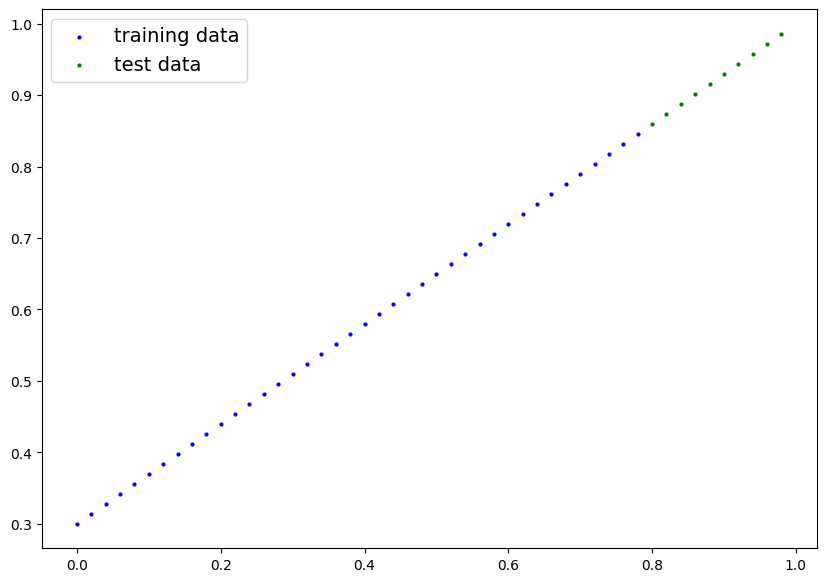

In [29]:
plot_predictions()

## build model

In [45]:
class linearRegressionModel(nn.Module) :
  def __init__(self) :
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad = True,
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                       requires_grad = True,
                                       dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [40]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

### pytorch model buulding essentials

In [61]:
# torch.manual_seed(42)

model_0 = linearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([-1.1229], requires_grad=True),
 Parameter containing:
 tensor([-0.1863], requires_grad=True)]

In [62]:
model_0.state_dict()

OrderedDict([('weights', tensor([-1.1229])), ('bias', tensor([-0.1863]))])

In [58]:
weight, bias

(0.7, 0.3)

### making prediction using torch.inference_mode()

In [63]:
with torch.inference_mode():
  y_preds = model_0(x_test)

with torch.no_grad() :
  y_preds = model_0(x_test)

y_preds, y_test

(tensor([[-1.0846],
         [-1.1071],
         [-1.1295],
         [-1.1520],
         [-1.1744],
         [-1.1969],
         [-1.2194],
         [-1.2418],
         [-1.2643],
         [-1.2867]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

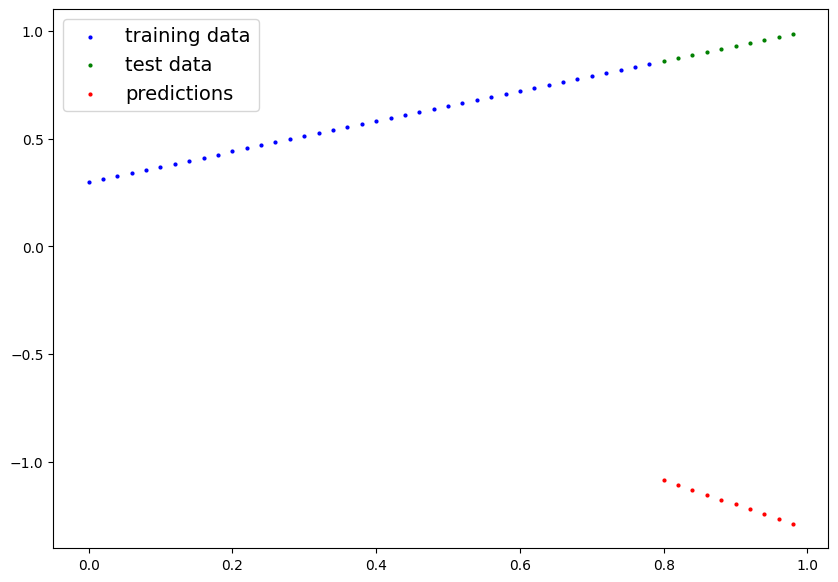

In [64]:
plot_predictions(predictions=y_preds)

## train model

In [72]:
model_0.state_dict()

OrderedDict([('weights', tensor([-1.1229])), ('bias', tensor([-0.1863]))])

In [67]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.01)

In [68]:
loss_fn

L1Loss()